In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [12]:
caminho_arquivo = 'dadosclientes.csv'

In [13]:
df = pd.read_csv(caminho_arquivo)

In [14]:
print(df.all)

<bound method DataFrame.all of       clientes  Valor_compra  qtde_produtos  forma_pag
0    cliente 2           378             10          1
1    cliente 5           475             18          1
2    cliente 1           285             10          1
3    cliente 1           181              4          0
4    cliente 7           177             20          1
..         ...           ...            ...        ...
195  cliente 5           391              2          0
196  cliente 7           115             16          0
197  cliente 2           156             12          0
198  cliente 6            46             19          0
199  cliente 7           329             11          0

[200 rows x 4 columns]>


In [15]:
# Passo 2: Preprocessamento
# Converta colunas categóricas para numéricas usando Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [16]:
# Passo 2: Preparar os dados
# Suponha que todas as colunas exceto 'forma_pag' são características
X = df.drop(columns=['forma_pag'])
y = df['forma_pag']

In [17]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Passo 3: Criar e Treinar o Modelo SVM
model = SVC(kernel='linear')  # Usando o kernel linear para simplicidade
model.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
# Passo 4: Fazer previsões
y_pred = model.predict(X_test)

In [20]:
# Passo 5: Avaliar o Modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [21]:
print(f'Acurácia do Modelo: {accuracy}')
print('\nMatriz de Confusão:')
print(conf_matrix)
print('\nRelatório de Classificação:')
print(class_report)

Acurácia do Modelo: 0.3

Matriz de Confusão:
[[ 0 42]
 [ 0 18]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.30      1.00      0.46        18

    accuracy                           0.30        60
   macro avg       0.15      0.50      0.23        60
weighted avg       0.09      0.30      0.14        60



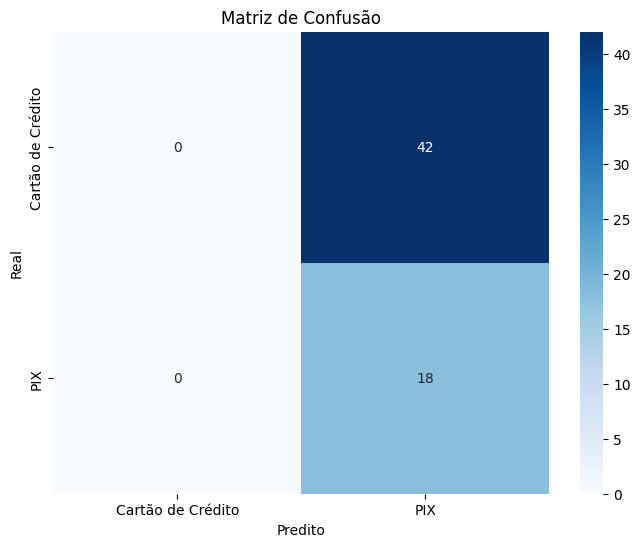

In [22]:
# Passo 6: Visualizar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Cartão de Crédito', 'PIX'], 
            yticklabels=['Cartão de Crédito', 'PIX'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()